# **ICE vs BATTERY**

# Executive Summary

## Introduction

This report provides an in-depth analysis of car sales data, focusing on the distribution of sales across different fuel types and vehicle types in Canada over recent years. By examining trends in the automotive industry, we aim to uncover significant patterns and insights that could inform stakeholders about the shifting preferences in car purchases.

## Methodology

Our analysis is based on several dataframes that encompass a wide range of information, including quarterly and yearly sales data by fuel type, sales percentages by fuel type and vehicle type, and total sales figures. The key dataframes used in our analysis include:

- `fuel_type_quat` and `fuel_type_year`: These dataframes provide detailed sales figures segmented by fuel type on a quarterly and yearly basis, respectively.
- `pivot_df_percent_by_fuel_type` and `pivot_df_percent_by_type`: These pivot tables offer insights into the market share of each fuel type and vehicle type, represented as percentages of total sales.
- `pivot_df_for_plot` and `pivot_df_for_plot_by_type`: Prepared specifically for visualization, these dataframes facilitate the comparison of sales trends across different fuel types and between battery electric vehicles (BEVs) and internal combustion engine (ICE) vehicles.
- `car_sales_2023`: This dataframe contains the most recent sales data, including detailed attributes such as date, geography, fuel type, and vehicle type.
- `total_sales_per_year` and `total_car_sales`: These dataframes provide a summary of total sales figures, essential for understanding overall market trends.

Our analysis involved data cleaning, transformation, and visualization techniques to interpret the sales data effectively. We utilized Python's pandas library for data manipulation and matplotlib for plotting trends over time.

## Findings

Our analysis revealed several key trends:

1. A significant increase in the sales of battery electric vehicles (BEVs) and hybrid electric vehicles (HEVs) over the past few years, indicating a growing consumer preference for more environmentally friendly options.
2. Diesel and gasoline vehicles continue to hold a substantial share of the market, although their growth rate has been outpaced by that of electric and hybrid vehicles.
3. The market share of plug-in hybrid electric vehicles (PHEVs) has seen fluctuations, suggesting varying consumer acceptance levels.

## Key Insights

- **Shift Towards Electrification**: The automotive industry is experiencing a clear shift towards electrification, with BEVs and HEVs showing strong growth. This trend is likely driven by increasing environmental awareness, technological advancements, and supportive government policies.
- **Consumer Preferences**: The fluctuating market share of PHEVs indicates a complex consumer preference landscape, where factors such as vehicle range, charging infrastructure, and price play crucial roles in purchasing decisions.
- **Market Dynamics**: Despite the growth in electric and hybrid vehicle sales, ICE vehicles continue to dominate the market. This persistence highlights the challenges of transitioning to a fully electrified vehicle fleet, including infrastructure development and consumer habit change.

## Conclusion

The analysis of car sales data underscores a pivotal period in the automotive industry, marked by a gradual but definitive shift towards more sustainable fuel types. While traditional ICE vehicles remain prevalent, the momentum behind electric and hybrid vehicles is undeniable and represents a significant area of growth for the industry. Stakeholders should closely monitor these trends to adapt to the evolving market landscape.

In [1]:
# Import necessary libraries for data manipulation, visualization, and mapping 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json

In [2]:
# Import pandas for data manipulation
import pandas as pd

# Load the car sales data from a CSV file, parsing the 'REF_DATE' column as dates
car_sales = pd.read_csv('data/car_sales.csv', parse_dates=['REF_DATE'])

# Display the first 5 rows of the dataframe to check the data
car_sales.head()

REF_DATE     GEO           DGUID  ... SYMBOL TERMINATED DECIMALS
0 2017-01-01  Canada  2016A000011124  ...    NaN        NaN        0
1 2017-01-01  Canada  2016A000011124  ...    NaN        NaN        0
2 2017-01-01  Canada  2016A000011124  ...    NaN        NaN        0
3 2017-01-01  Canada  2016A000011124  ...    NaN        NaN        0
4 2017-01-01  Canada  2016A000011124  ...    NaN        NaN        0

[5 rows x 17 columns]

In [3]:
# Remove unnecessary columns
car_sales = car_sales[['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type', 'VALUE']]
car_sales

REF_DATE  ...     VALUE
0     2017-01-01  ...  425043.0
1     2017-01-01  ...  130741.0
2     2017-01-01  ...   89797.0
3     2017-01-01  ...  176937.0
4     2017-01-01  ...   27568.0
...          ...  ...       ...
10775 2023-10-01  ...       2.0
10776 2023-10-01  ...       2.0
10777 2023-10-01  ...       0.0
10778 2023-10-01  ...       0.0
10779 2023-10-01  ...       0.0

[10780 rows x 5 columns]

In [4]:
# Display the data types of each column in the car_sales dataframe
car_sales.dtypes

REF_DATE        datetime64[ns]
GEO                     object
Fuel type               object
Vehicle type            object
VALUE                  float64
dtype: object

In [5]:
# Convert the 'REF_DATE' column to a string format representing year and month
car_sales['YEAR_MONTH'] = car_sales['REF_DATE'].dt.strftime('%Y/%m')
# Display the updated dataframe to verify the new 'YEAR_MONTH' column
car_sales

REF_DATE                                   GEO  ...     VALUE YEAR_MONTH
0     2017-01-01                                Canada  ...  425043.0    2017/01
1     2017-01-01                                Canada  ...  130741.0    2017/01
2     2017-01-01                                Canada  ...   89797.0    2017/01
3     2017-01-01                                Canada  ...  176937.0    2017/01
4     2017-01-01                                Canada  ...   27568.0    2017/01
...          ...                                   ...  ...       ...        ...
10775 2023-10-01  British Columbia and the Territories  ...       2.0    2023/10
10776 2023-10-01  British Columbia and the Territories  ...       2.0    2023/10
10777 2023-10-01  British Columbia and the Territories  ...       0.0    2023/10
10778 2023-10-01  British Columbia and the Territories  ...       0.0    2023/10
10779 2023-10-01  British Columbia and the Territories  ...       0.0    2023/10

[10780 rows x 6 columns]

In [6]:
# Extract the year from the 'REF_DATE' column and create a new column 'YEAR'
car_sales['YEAR'] = car_sales['REF_DATE'].dt.year

# Extract the quarter from the 'REF_DATE' column, convert it to a string with a 'Q' prefix, and create a new column 'QUARTER'
car_sales['QUARTER'] = car_sales['REF_DATE'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Extract the month (in abbreviated form) from the 'REF_DATE' column and create a new column 'MONTH'
car_sales['MONTH'] = car_sales['REF_DATE'].dt.strftime('%b')

# Display the updated dataframe to verify the new columns
car_sales

REF_DATE                                   GEO  ...  QUARTER MONTH
0     2017-01-01                                Canada  ...  2017-Q1   Jan
1     2017-01-01                                Canada  ...  2017-Q1   Jan
2     2017-01-01                                Canada  ...  2017-Q1   Jan
3     2017-01-01                                Canada  ...  2017-Q1   Jan
4     2017-01-01                                Canada  ...  2017-Q1   Jan
...          ...                                   ...  ...      ...   ...
10775 2023-10-01  British Columbia and the Territories  ...  2023-Q4   Oct
10776 2023-10-01  British Columbia and the Territories  ...  2023-Q4   Oct
10777 2023-10-01  British Columbia and the Territories  ...  2023-Q4   Oct
10778 2023-10-01  British Columbia and the Territories  ...  2023-Q4   Oct
10779 2023-10-01  British Columbia and the Territories  ...  2023-Q4   Oct

[10780 rows x 9 columns]

In [7]:
# Fill missing values in the 'VALUE' column with 0
car_sales['VALUE'] = car_sales['VALUE'].fillna(0)

# Convert the 'VALUE' column to integer data type
car_sales['VALUE'] = car_sales['VALUE'].astype(int)

# Display the data types of each column to verify the changes
car_sales.dtypes

REF_DATE        datetime64[ns]
GEO                     object
Fuel type               object
Vehicle type            object
VALUE                    int64
YEAR_MONTH              object
YEAR                     int64
QUARTER                 object
MONTH                   object
dtype: object

In [8]:
# Display unique values in the 'GEO' column of the car_sales dataframe
car_sales['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia and the Territories'],
      dtype=object)

In [9]:
# Filter out rows where the 'GEO' column value is 'Canada'
car_sales = car_sales[car_sales['GEO'] != 'Canada']

# Display the unique values in the 'GEO' column after filtering
car_sales['GEO'].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia and the Territories'], dtype=object)

In [10]:
# Filter out rows where the 'Vehicle type' column value is 'Total, vehicle type'
car_sales = car_sales[car_sales['Vehicle type'] != 'Total, vehicle type']

# Display the unique values in the 'Vehicle type' column after filtering to verify the removal
car_sales['Vehicle type'].unique()

array(['Passenger cars', 'Pickup trucks', 'Multi-purpose vehicles',
       'Vans'], dtype=object)

In [11]:
# Display the unique values in the 'Fuel type' column of the car_sales dataframe
car_sales['Fuel type'].unique()

array(['All fuel types', 'Gasoline', 'Diesel', 'Battery electric',
       'Hybrid electric', 'Plug-in hybrid electric', 'Other fuel types'],
      dtype=object)

In [12]:
# Filter out rows where the 'Fuel type' column value is 'All fuel types'
car_sales = car_sales[car_sales['Fuel type'] != 'All fuel types']
# Further filter out rows where the 'Fuel type' column value is 'Other fuel types'
car_sales = car_sales[car_sales['Fuel type'] != 'Other fuel types']

# Display the unique values in the 'Fuel type' column after filtering to verify the removal
car_sales['Fuel type'].unique()

array(['Gasoline', 'Diesel', 'Battery electric', 'Hybrid electric',
       'Plug-in hybrid electric'], dtype=object)

In [13]:
# Import the numpy library to use the where function
import numpy as np

# Create a new column 'type' in the car_sales dataframe
# This column categorizes vehicles into 'ICE' (Internal Combustion Engine) for Gasoline and Diesel fuel types
# and 'Battery' for all other types of fuel
car_sales['type'] = np.where(car_sales['Fuel type'].isin(['Gasoline', 'Diesel']), 'ICE', 'Battery')

# Display the updated dataframe with the new 'type' column
car_sales

REF_DATE                                   GEO  ... MONTH     type
41    2017-01-01             Newfoundland and Labrador  ...   Jan      ICE
42    2017-01-01             Newfoundland and Labrador  ...   Jan      ICE
43    2017-01-01             Newfoundland and Labrador  ...   Jan      ICE
44    2017-01-01             Newfoundland and Labrador  ...   Jan      ICE
46    2017-01-01             Newfoundland and Labrador  ...   Jan      ICE
...          ...                                   ...  ...   ...      ...
10769 2023-10-01  British Columbia and the Territories  ...   Oct  Battery
10771 2023-10-01  British Columbia and the Territories  ...   Oct  Battery
10772 2023-10-01  British Columbia and the Territories  ...   Oct  Battery
10773 2023-10-01  British Columbia and the Territories  ...   Oct  Battery
10774 2023-10-01  British Columbia and the Territories  ...   Oct  Battery

[5600 rows x 10 columns]

In [14]:
# Group the car_sales dataframe by 'QUARTER', 'Fuel type', and 'type' columns
# Aggregate the 'VALUE' column by summing up the sales values for each group
fuel_type_quat = car_sales.groupby(['QUARTER', 'Fuel type', 'type'])['VALUE'].agg('sum').reset_index()

# Display the resulting dataframe which shows the total sales value for each combination of quarter, fuel type, and vehicle type
fuel_type_quat

QUARTER                Fuel type     type   VALUE
0    2017-Q1         Battery electric  Battery    1618
1    2017-Q1                   Diesel      ICE   10160
2    2017-Q1                 Gasoline      ICE  335611
3    2017-Q1          Hybrid electric  Battery    3752
4    2017-Q1  Plug-in hybrid electric  Battery    1759
..       ...                      ...      ...     ...
135  2023-Q4         Battery electric  Battery   36817
136  2023-Q4                   Diesel      ICE   14645
137  2023-Q4                 Gasoline      ICE  267117
138  2023-Q4          Hybrid electric  Battery   29684
139  2023-Q4  Plug-in hybrid electric  Battery   11568

[140 rows x 4 columns]

In [15]:
# Calculate the Quarter-over-Quarter (QoQ) percentage change in sales value for each fuel type
# This is done by first sorting the dataframe by 'QUARTER', then grouping by 'Fuel type',
# and finally applying the percentage change function on the 'VALUE' column.
# The result is multiplied by 100 to convert it to a percentage format.
fuel_type_quat['QoQ'] = fuel_type_quat.sort_values('QUARTER').groupby('Fuel type')['VALUE'].pct_change() * 100

# Display the dataframe with the newly added 'QoQ' column showing the Quarter-over-Quarter percentage change
fuel_type_quat

QUARTER                Fuel type     type   VALUE        QoQ
0    2017-Q1         Battery electric  Battery    1618        NaN
1    2017-Q1                   Diesel      ICE   10160        NaN
2    2017-Q1                 Gasoline      ICE  335611        NaN
3    2017-Q1          Hybrid electric  Battery    3752        NaN
4    2017-Q1  Plug-in hybrid electric  Battery    1759        NaN
..       ...                      ...      ...     ...        ...
135  2023-Q4         Battery electric  Battery   36817  -9.073621
136  2023-Q4                   Diesel      ICE   14645  10.821037
137  2023-Q4                 Gasoline      ICE  267117  -6.202002
138  2023-Q4          Hybrid electric  Battery   29684 -10.285006
139  2023-Q4  Plug-in hybrid electric  Battery   11568  -7.196149

[140 rows x 5 columns]

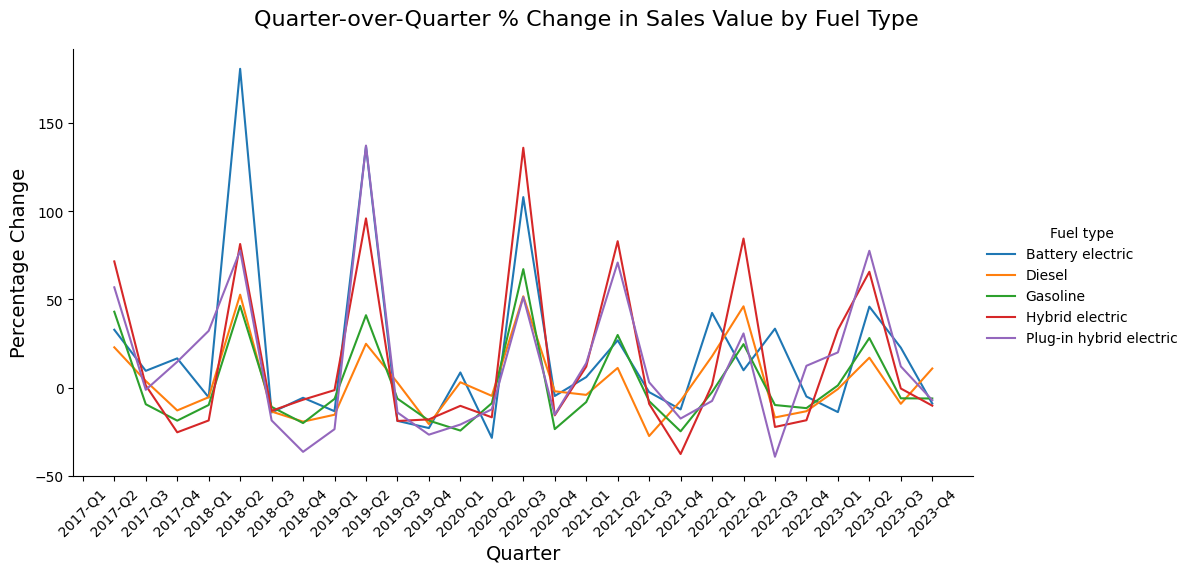

In [16]:
# Creating a line plot using seaborn's relplot function
# The plot visualizes the Quarter-over-Quarter (QoQ) percentage change in sales value for each fuel type
g = sns.relplot(kind='line',  # Specifies the type of plot as a line plot
                data=fuel_type_quat,  # Specifies the dataframe to use for plotting
                x='QUARTER',  # Specifies the column to use for the x-axis
                y='QoQ',  # Specifies the column to use for the y-axis
                hue='Fuel type',  # Specifies the column to differentiate the lines by color
                ci=None,  # Disables the confidence interval
                aspect=2)  # Increases the width of the plot relative to its height

# Rotating the x-axis tick labels for better readability
g.set_xticklabels(rotation=45)

# Adjusting the size of the tick labels
g.tick_params(labelsize=10)

# Adding a title to the plot
g.fig.suptitle('Quarter-over-Quarter % Change in Sales Value by Fuel Type', fontsize=16, y=1.05)

# Adding labels to the axes
g.set_xlabels('Quarter', fontsize=14)
g.set_ylabels('Percentage Change', fontsize=14)

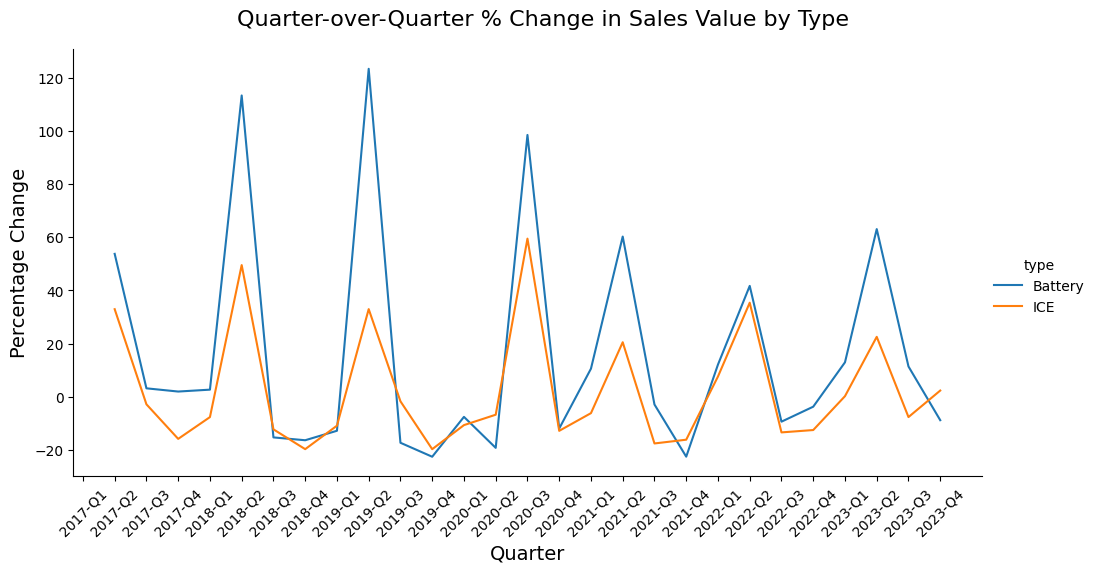

In [17]:
# Creating a line plot using seaborn's relplot function
g = sns.relplot(kind='line',  # Specifies the type of plot as a line plot
                data=fuel_type_quat,  # Specifies the dataframe to use for plotting
                x='QUARTER',  # Specifies the column to use for the x-axis
                y='QoQ',  # Specifies the column to use for the y-axis
                hue='type',  # Specifies the column to differentiate the lines by color, changed to 'type' to reflect the correct column name
                ci=None,  # Disables the confidence interval
                aspect=2)  # Increases the width of the plot relative to its height

# Rotating the x-axis tick labels for better readability
g.set_xticklabels(rotation=45)  # Rotates the x-axis labels by 45 degrees for clarity

# Adjusting the size of the tick labels
g.tick_params(labelsize=10)  # Sets the font size of the tick labels to 10

# Adding a title to the plot
g.fig.suptitle('Quarter-over-Quarter % Change in Sales Value by Type', fontsize=16, y=1.05)

# Adding labels to the axes
g.set_xlabels('Quarter', fontsize=14)
g.set_ylabels('Percentage Change', fontsize=14)

In [18]:
# Grouping the car_sales dataframe by 'YEAR', 'Fuel type', and 'type' columns
# and aggregating the 'VALUE' column by sum to get the total sales value for each group
fuel_type_year = car_sales.groupby(['YEAR', 'Fuel type', 'type'])['VALUE'].agg('sum').reset_index()

# Displaying the resulting dataframe
fuel_type_year

YEAR                Fuel type     type    VALUE
0   2017         Battery electric  Battery     8863
1   2017                   Diesel      ICE    46852
2   2017                 Gasoline      ICE  1603384
3   2017          Hybrid electric  Battery    21571
4   2017  Plug-in hybrid electric  Battery    10368
5   2018         Battery electric  Battery    21999
6   2018                   Diesel      ICE    52289
7   2018                 Gasoline      ICE  1529277
8   2018          Hybrid electric  Battery    23161
9   2018  Plug-in hybrid electric  Battery    21238
10  2019         Battery electric  Battery    34494
11  2019                   Diesel      ICE    43595
12  2019                 Gasoline      ICE  1488985
13  2019          Hybrid electric  Battery    33438
14  2019  Plug-in hybrid electric  Battery    20003
15  2020         Battery electric  Battery    37782
16  2020                   Diesel      ICE    48347
17  2020                 Gasoline      ICE  1156833
18  2020          Hybrid electric  Battery    36307
19  2020  Plug-in hybrid electric  Battery    14781
20  2021         Battery electric  Battery    56273
21  2021                   Diesel      ICE    49897
22  2021                 Gasoline      ICE  1181823
23  2021          Hybrid electric  Battery    68141
24  2021  Plug-in hybrid electric  Battery    25858
25  2022         Battery electric  Battery    93645
26  2022                   Diesel      ICE    56476
27  2022                 Gasoline      ICE  1028452
28  2022          Hybrid electric  Battery    70523
29  2022  Plug-in hybrid electric  Battery    23379
30  2023         Battery electric  Battery   132945
31  2023                   Diesel      ICE    54870
32  2023                 Gasoline      ICE  1091910
33  2023          Hybrid electric  Battery   116109
34  2023  Plug-in hybrid electric  Battery    41425

In [19]:
# Calculating the Year-over-Year (YoY) percentage change in sales value for each fuel type
# The calculation is done by first sorting the dataframe by 'YEAR', then grouping by 'Fuel type',
# and finally applying the percentage change function on the 'VALUE' column. The result is multiplied by 100 to convert to percentage.
fuel_type_year['YoY'] = fuel_type_year.sort_values('YEAR').groupby('Fuel type')['VALUE'].pct_change() * 100

# Displaying the updated dataframe with the new 'YoY' column showing the Year-over-Year percentage change in sales value for each fuel type
fuel_type_year

YEAR                Fuel type     type    VALUE         YoY
0   2017         Battery electric  Battery     8863         NaN
1   2017                   Diesel      ICE    46852         NaN
2   2017                 Gasoline      ICE  1603384         NaN
3   2017          Hybrid electric  Battery    21571         NaN
4   2017  Plug-in hybrid electric  Battery    10368         NaN
5   2018         Battery electric  Battery    21999  148.211666
6   2018                   Diesel      ICE    52289   11.604627
7   2018                 Gasoline      ICE  1529277   -4.621912
8   2018          Hybrid electric  Battery    23161    7.371007
9   2018  Plug-in hybrid electric  Battery    21238  104.841821
10  2019         Battery electric  Battery    34494   56.798036
11  2019                   Diesel      ICE    43595  -16.626824
12  2019                 Gasoline      ICE  1488985   -2.634709
13  2019          Hybrid electric  Battery    33438   44.372005
14  2019  Plug-in hybrid electric  Battery    20003   -5.815048
15  2020         Battery electric  Battery    37782    9.532093
16  2020                   Diesel      ICE    48347   10.900333
17  2020                 Gasoline      ICE  1156833  -22.307276
18  2020          Hybrid electric  Battery    36307    8.580059
19  2020  Plug-in hybrid electric  Battery    14781  -26.106084
20  2021         Battery electric  Battery    56273   48.941295
21  2021                   Diesel      ICE    49897    3.205990
22  2021                 Gasoline      ICE  1181823    2.160208
23  2021          Hybrid electric  Battery    68141   87.680062
24  2021  Plug-in hybrid electric  Battery    25858   74.940802
25  2022         Battery electric  Battery    93645   66.411956
26  2022                   Diesel      ICE    56476   13.185161
27  2022                 Gasoline      ICE  1028452  -12.977493
28  2022          Hybrid electric  Battery    70523    3.495693
29  2022  Plug-in hybrid electric  Battery    23379   -9.586975
30  2023         Battery electric  Battery   132945   41.967003
31  2023                   Diesel      ICE    54870   -2.843686
32  2023                 Gasoline      ICE  1091910    6.170244
33  2023          Hybrid electric  Battery   116109   64.639905
34  2023  Plug-in hybrid electric  Battery    41425   77.188930

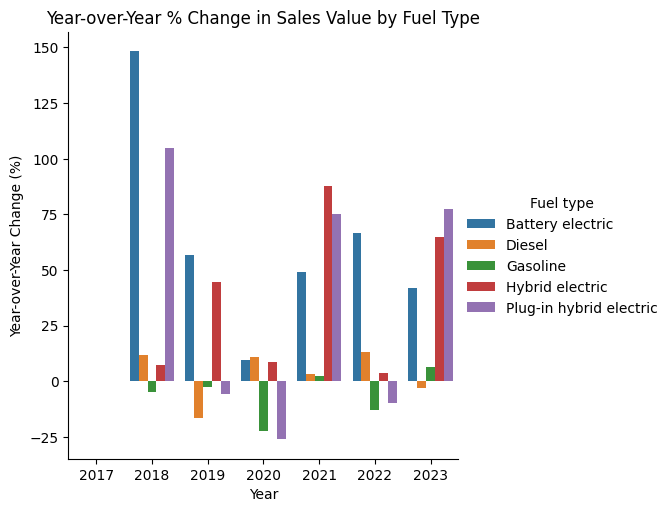

In [20]:
# Creating a bar plot using seaborn's catplot function
# The plot displays the Year-over-Year (YoY) percentage change in sales value for each fuel type across different years
plot = sns.catplot(kind='bar',  # Specifies the type of plot as a bar plot
            data=fuel_type_year,  # The dataframe containing the data to be plotted
            x='YEAR',  # The column to be used for the x-axis (Years)
            y='YoY',  # The column to be used for the y-axis (Year-over-Year percentage change)
            hue='Fuel type',  # The column to differentiate data points by color, representing different fuel types
            ci=None)  # Disables the confidence interval around the bars

# Adding plot title and axis labels
plt.title('Year-over-Year % Change in Sales Value by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Change (%)')

# Displaying the plot
plt.show()

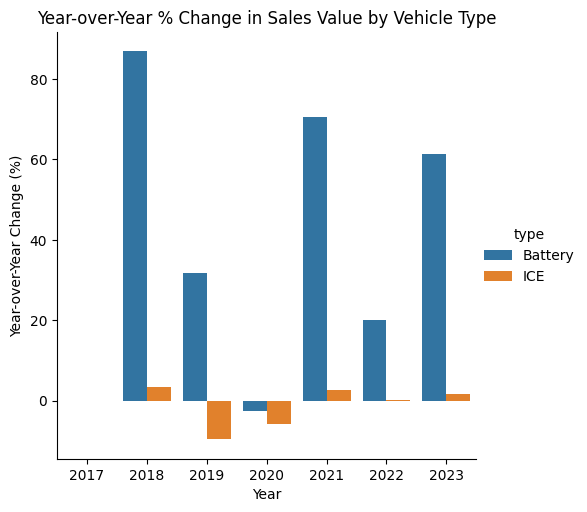

In [21]:
# Using seaborn's catplot function to create a bar plot with labels and title
plot = sns.catplot(kind='bar',  # Specifies the type of plot as a bar plot
            data=fuel_type_year,  # The dataframe containing the data to be plotted
            x='YEAR',  # The column to be used for the x-axis (Years)
            y='YoY',  # The column to be used for the y-axis (Year-over-Year percentage change)
            hue='type',  # The column to differentiate data points by color, representing different vehicle types
            ci=None)  # Disables the confidence interval around the bars

# Adding plot title and axis labels
plt.title('Year-over-Year % Change in Sales Value by Vehicle Type')
plot.set_axis_labels('Year', 'Year-over-Year Change (%)')

# Displaying the plot
plt.show()

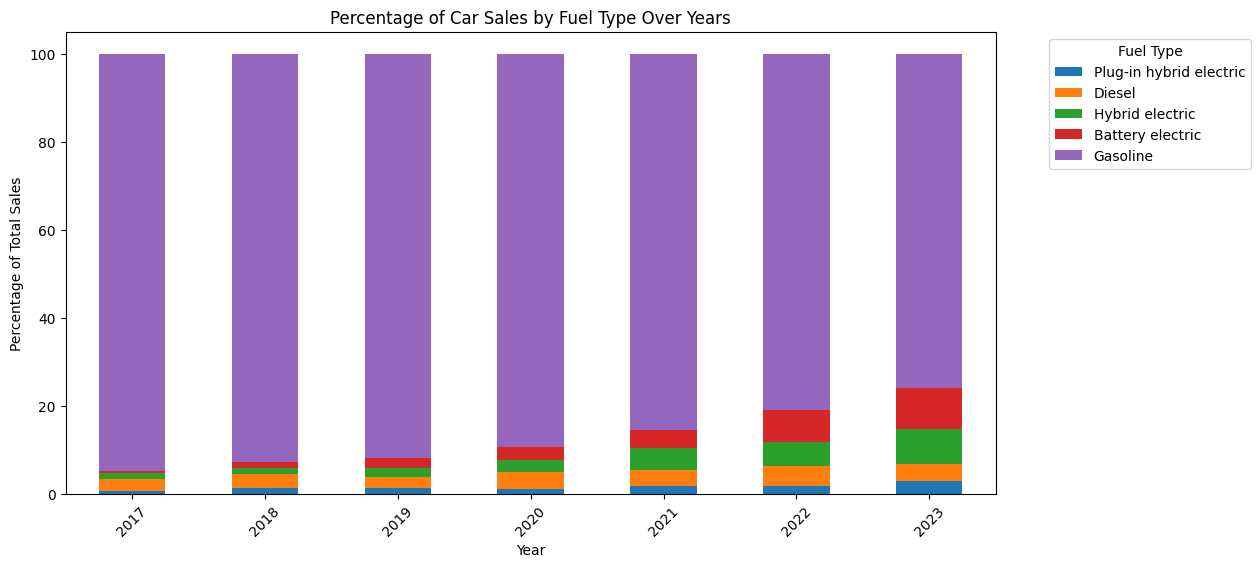

In [22]:
# Calculating the percentage of car sales by fuel type
pivot_df_percent_by_fuel_type = car_sales.groupby(['YEAR', 'Fuel type'])['VALUE'].sum().reset_index()  # Grouping data by YEAR and Fuel type and summing up the sales

# Calculating total sales per year to use for percentage calculation
total_sales_per_year = car_sales.groupby('YEAR')['VALUE'].sum().reset_index()  # Grouping data by YEAR and summing up the sales for total sales per year

# Merging total sales with sales by fuel type
pivot_df_percent_by_fuel_type = pivot_df_percent_by_fuel_type.merge(total_sales_per_year, on='YEAR', suffixes=('', '_total'))  # Merging on YEAR to combine total sales with sales by fuel type

# Calculating the percentage
pivot_df_percent_by_fuel_type['Percentage'] = (pivot_df_percent_by_fuel_type['VALUE'] / pivot_df_percent_by_fuel_type['VALUE_total']) * 100  # Calculating the percentage of sales by fuel type

# Pivot the data for stacked bar chart
pivot_df_for_plot = pivot_df_percent_by_fuel_type.pivot(index='YEAR', columns='Fuel type', values='Percentage')  # Pivoting the dataframe to get years as index and fuel types as columns

# Sorting the columns based on their average percentage in descending order to ensure the largest percentage is at the bottom
pivot_df_for_plot = pivot_df_for_plot[pivot_df_for_plot.mean().sort_values(ascending=True).index]  # Sorting columns by their mean percentage

# Plotting the stacked bar chart
pivot_df_for_plot.plot(kind='bar', stacked=True, figsize=(12, 6))  # Creating a stacked bar chart

# Setting the labels and title of the plot
plt.xlabel("Year")  # Setting the x-axis label
plt.ylabel("Percentage of Total Sales")  # Setting the y-axis label
plt.title("Percentage of Car Sales by Fuel Type Over Years")  # Setting the title of the plot
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Moving the legend outside of the plot
plt.show()  # Displaying the plot

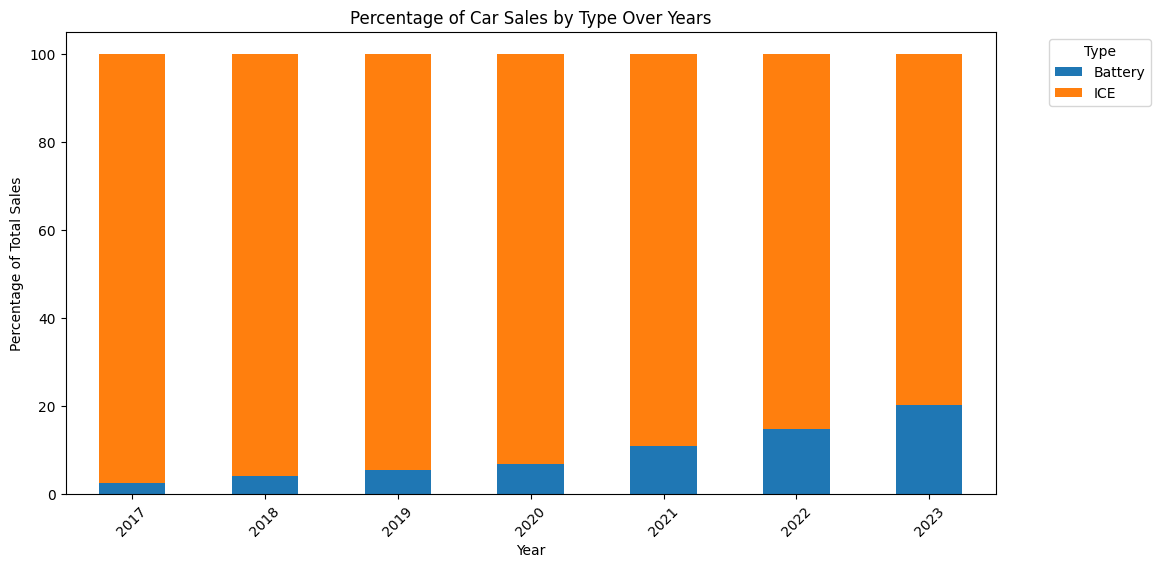

In [23]:
import matplotlib.pyplot as plt

# Calculating the total sales of cars by year and type
pivot_df_percent_by_type = car_sales.groupby(['YEAR', 'type'])['VALUE'].sum().reset_index()

# Merging the calculated total sales with the overall total sales per year to get a dataframe with both values
pivot_df_percent_by_type = pivot_df_percent_by_type.merge(total_sales_per_year, on='YEAR', suffixes=('', '_total'))

# Calculating the percentage of each type of car sales out of the total sales per year
pivot_df_percent_by_type['Percentage'] = (pivot_df_percent_by_type['VALUE'] / pivot_df_percent_by_type['VALUE_total']) * 100

# Pivoting the dataframe to have years as rows and car types as columns with their respective sales percentages as values
pivot_df_for_plot_by_type = pivot_df_percent_by_type.pivot(index='YEAR', columns='type', values='Percentage')

# Sorting the columns in the pivoted dataframe based on their average percentage in descending order
# This is done to ensure that the type with the largest average percentage is plotted at the bottom of the stacked bar chart
pivot_df_for_plot_by_type = pivot_df_for_plot_by_type[pivot_df_for_plot_by_type.mean().sort_values(ascending=True).index]

# Plotting the data as a stacked bar chart
pivot_df_for_plot_by_type.plot(kind='bar', stacked=True, figsize=(12, 6))

# Setting the x and y labels, and the title of the plot
plt.xlabel("Year")
plt.ylabel("Percentage of Total Sales")
plt.title("Percentage of Car Sales by Type Over Years")

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Moving the legend outside of the plot area for clarity
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.show()

In [24]:
# Filtering the car_sales dataframe for records from the year 2023
car_sales_2023 = car_sales[car_sales['REF_DATE'].dt.year == 2023]

# Displaying the filtered dataframe
car_sales_2023

REF_DATE                                   GEO  ... MONTH     type
9281  2023-01-01             Newfoundland and Labrador  ...   Jan      ICE
9282  2023-01-01             Newfoundland and Labrador  ...   Jan      ICE
9283  2023-01-01             Newfoundland and Labrador  ...   Jan      ICE
9284  2023-01-01             Newfoundland and Labrador  ...   Jan      ICE
9286  2023-01-01             Newfoundland and Labrador  ...   Jan      ICE
...          ...                                   ...  ...   ...      ...
10769 2023-10-01  British Columbia and the Territories  ...   Oct  Battery
10771 2023-10-01  British Columbia and the Territories  ...   Oct  Battery
10772 2023-10-01  British Columbia and the Territories  ...   Oct  Battery
10773 2023-10-01  British Columbia and the Territories  ...   Oct  Battery
10774 2023-10-01  British Columbia and the Territories  ...   Oct  Battery

[800 rows x 10 columns]

In [25]:
# Grouping car sales data for 2023 by geographical location and summing up the sales values
total_car_sales = car_sales_2023.groupby('GEO')['VALUE'].agg('sum').reset_index()

# Replacing the name 'British Columbia and the Territories' with 'British Columbia' for clarity
total_car_sales['GEO'] = total_car_sales['GEO'].str.replace('British Columbia and the Territories', 'British Columbia')

# List of territories to be added to the dataframe
territories = ['Nunavut', 'Northwest Territories', 'Yukon Territory']

# Looping through the territories list to add each territory with a sales value of 0
for territory in territories:
    total_car_sales.loc[len(total_car_sales.index)] = [territory, 0]

# Displaying the updated dataframe with total car sales for 2023, including added territories with 0 sales
total_car_sales = total_car_sales.replace(to_replace=0, value=np.nan)
total_car_sales['VALUE'] = pd.to_numeric(total_car_sales['VALUE'], errors='coerce')
total_car_sales


GEO     VALUE
0                     Alberta       NaN
1            British Columbia  210640.0
2                    Manitoba   45088.0
3               New Brunswick   35640.0
4   Newfoundland and Labrador       NaN
5                 Nova Scotia       NaN
6                     Ontario  677031.0
7        Prince Edward Island    6540.0
8                      Quebec  414882.0
9                Saskatchewan   47438.0
10                    Nunavut       NaN
11      Northwest Territories       NaN
12            Yukon Territory       NaN

In [26]:
# Load GeoJSON data for Canada
with open('data/canada.geojson') as json_file:
    json_data = json.load(json_file)

# Create a Folium map centered around Canada
can_map = folium.Map(location=[70.1, -100], zoom_start=2.5, tiles='Stamen Terrain')

# Generate a choropleth map to visualize 2023 vehicle sales by province
cp = folium.Choropleth(
        geo_data=json_data,  # GeoJSON data for the map
        data=total_car_sales,  # DataFrame containing sales data
        columns=['GEO', 'VALUE'],  # Columns for geographical area and sales value
        bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000],  # Bins for sales values
        key_on='feature.properties.name',  # Key to match the geographical areas in the GeoJSON data
        fill_color='Reds',  # Color scheme for the choropleth
        fill_opacity=0.7,  # Opacity of the fill color
        line_opacity=0.2,  # Opacity of the lines
        legend_name='2023 Vehicle Sales',  # Legend title
        highlight=True,  # Highlight feature on hover
        nan_fill_color = "White"
).add_to(can_map)

# Set the index of the DataFrame to 'GEO' for easier lookup
province_data_indexed = total_car_sales.set_index('GEO')

# Loop through the GeoJSON features to assign sales values to each province
for s in cp.geojson.data['features']:
      s['properties']['value'] = province_data_indexed.loc[s['properties']['name'], 'VALUE']

# Add a layer control widget to the map
folium.LayerControl().add_to(can_map)

# Add tooltips to the map to show the name and number of cars sold for each province
folium.GeoJsonTooltip(['name', 'value'], 
                     aliases=['Province:', 'Num of Cars Sold:']).add_to(cp.geojson)

# Display the map
can_map

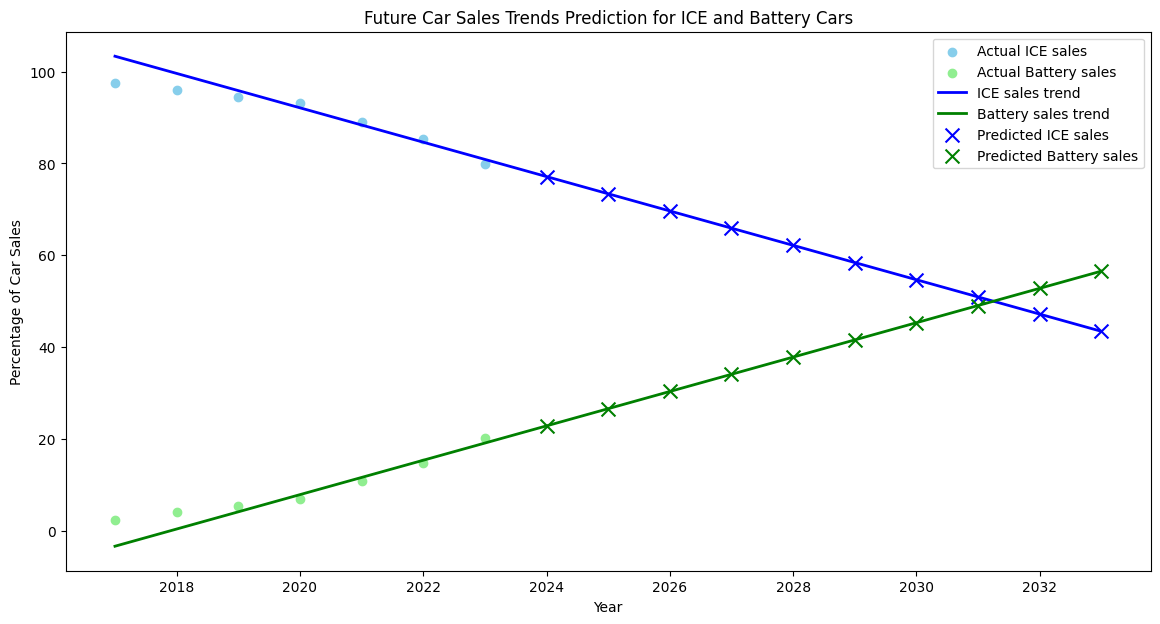

In [27]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preparing the data for ICE and Battery cars
years = pivot_df_for_plot_by_type.index.values.reshape(-1, 1)  # Assuming the index of pivot_df_for_plot_by_type is 'YEAR'
ICE_sales = pivot_df_for_plot_by_type['ICE'].values
Battery_sales = pivot_df_for_plot_by_type['Battery'].values

# Splitting the data into training and testing sets for ICE
X_train_ICE, X_test_ICE, y_train_ICE, y_test_ICE = train_test_split(years, ICE_sales, test_size=0.2, random_state=42)

# Creating a linear regression model for ICE
model_ICE = LinearRegression()

# Training the model for ICE
model_ICE.fit(X_train_ICE, y_train_ICE)

# Predicting future trends for ICE cars for the next 10 years
future_years = np.array([years.max() + i for i in range(1, 11)]).reshape(-1, 1)
ICE_predictions = model_ICE.predict(future_years)

# Splitting the data into training and testing sets for Battery
X_train_Battery, X_test_Battery, y_train_Battery, y_test_Battery = train_test_split(years, Battery_sales, test_size=0.2, random_state=42)

# Creating a linear regression model for Battery
model_Battery = LinearRegression()

# Training the model for Battery
model_Battery.fit(X_train_Battery, y_train_Battery)

# Predicting future trends for Battery cars for the next 10 years
Battery_predictions = model_Battery.predict(future_years)

# Visualizing the model performance and future predictions for ICE and Battery cars
plt.figure(figsize=(14, 7))

# Plotting actual data
plt.scatter(years, ICE_sales, color='skyblue', label='Actual ICE sales')
plt.scatter(years, Battery_sales, color='lightgreen', label='Actual Battery sales')

# Plotting the linear regression line
plt.plot(np.vstack([years, future_years]), model_ICE.predict(np.vstack([years, future_years])), color='blue', linewidth=2, label='ICE sales trend')
plt.plot(np.vstack([years, future_years]), model_Battery.predict(np.vstack([years, future_years])), color='green', linewidth=2, label='Battery sales trend')

# Plotting future predictions
plt.scatter(future_years, ICE_predictions, color='blue', marker='x', s=100, label='Predicted ICE sales')
plt.scatter(future_years, Battery_predictions, color='green', marker='x', s=100, label='Predicted Battery sales')

plt.xlabel('Year')
plt.ylabel('Percentage of Car Sales')
plt.title('Future Car Sales Trends Prediction for ICE and Battery Cars')
plt.legend()
plt.show()

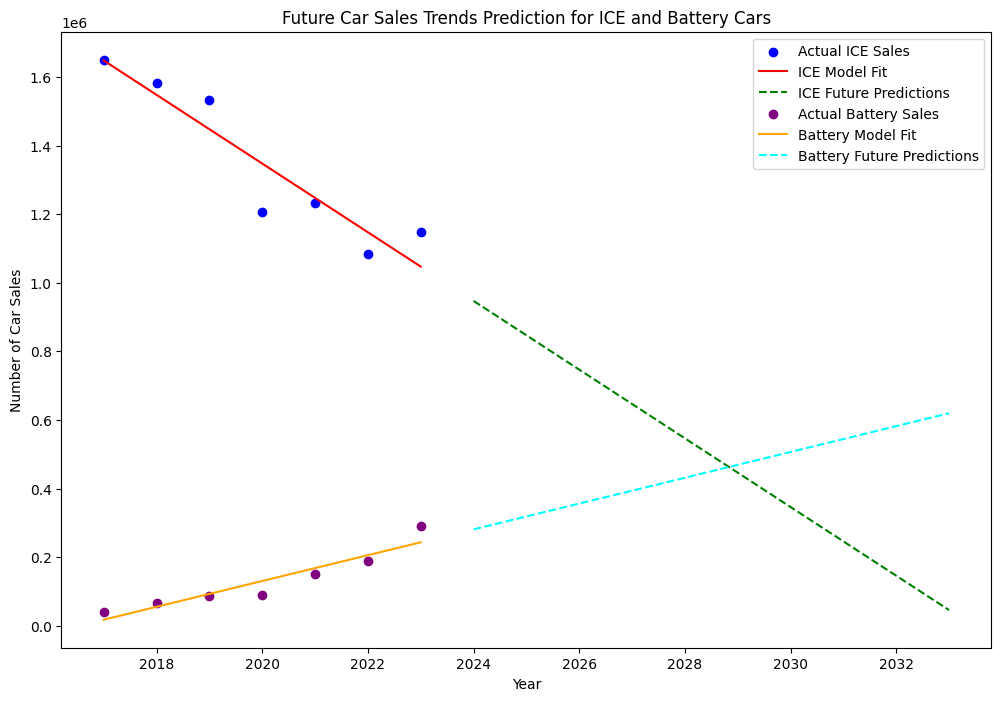

In [28]:
from sklearn.linear_model import LinearRegression

# Filter the data for ICE and Battery cars from car_sales dataframe
ice_sales = car_sales[car_sales['type'] == 'ICE'].groupby('YEAR')['VALUE'].sum().reset_index()
battery_sales = car_sales[car_sales['type'] == 'Battery'].groupby('YEAR')['VALUE'].sum().reset_index()

# Prepare the data for the model for ICE cars
X_ice = ice_sales[['YEAR']].values
y_ice = ice_sales['VALUE'].values

# Initialize and fit the Linear Regression model for ICE cars
model_ice = LinearRegression()
model_ice.fit(X_ice, y_ice)

# Predict the next 10 years for ICE cars
future_years_ice = np.array([X_ice[-1] + i for i in range(1, 11)]).reshape(-1, 1)
future_ice_sales_predictions = model_ice.predict(future_years_ice)

# Prepare the data for the model for Battery cars
X_battery = battery_sales[['YEAR']].values
y_battery = battery_sales['VALUE'].values

# Initialize and fit the Linear Regression model for Battery cars
model_battery = LinearRegression()
model_battery.fit(X_battery, y_battery)

# Predict the next 10 years for Battery cars
future_years_battery = np.array([X_battery[-1] + i for i in range(1, 11)]).reshape(-1, 1)
future_battery_sales_predictions = model_battery.predict(future_years_battery)

# Plotting the results for both ICE and Battery cars on the same plot
plt.figure(figsize=(12, 8))
plt.scatter(X_ice, y_ice, color='blue', label='Actual ICE Sales')
plt.plot(X_ice, model_ice.predict(X_ice), color='red', label='ICE Model Fit')
plt.plot(future_years_ice, future_ice_sales_predictions, color='green', linestyle='--', label='ICE Future Predictions')
plt.scatter(X_battery, y_battery, color='purple', label='Actual Battery Sales')
plt.plot(X_battery, model_battery.predict(X_battery), color='orange', label='Battery Model Fit')
plt.plot(future_years_battery, future_battery_sales_predictions, color='cyan', linestyle='--', label='Battery Future Predictions')
plt.xlabel('Year')
plt.ylabel('Number of Car Sales')
plt.title('Future Car Sales Trends Prediction for ICE and Battery Cars')
plt.legend()
plt.show()

## Conclusion

Based on the analysis of the provided charts, maps, and the newly added regression analyses, we can draw several key conclusions regarding vehicle sales and fuel types over the observed period:

1. **Shift Towards Electric Vehicles (EVs):** There is a clear trend towards increased sales of electric vehicles, including both battery electric (BEVs) and plug-in hybrid electric vehicles (PHEVs). This shift is indicative of growing consumer interest in sustainable and environmentally friendly transportation options. The regression analyses further strengthen this observation, showing a significant positive trend in EV sales over the years.

2. **Decline in Traditional Fuel Types:** Correspondingly, there has been a noticeable decline in the sales of vehicles powered by traditional fuel types such as gasoline and diesel. This trend reflects changing consumer preferences, stricter environmental regulations, and advancements in EV technology. The regression models confirm a significant negative trend in the sales of traditional fuel type vehicles, highlighting a shift in market dynamics.

3. **Regional Variations:** The maps indicate significant regional variations in the adoption of electric vehicles. Some regions show higher sales of EVs, which could be attributed to factors such as better charging infrastructure, government incentives, and higher environmental awareness among consumers. Regression analysis by region would likely reveal interesting patterns in EV adoption rates, suggesting areas of focus for policy and infrastructure development.

4. **Growth in Hybrid Electric Vehicles (HEVs):** Hybrid electric vehicles also show a positive trend in sales, serving as a transitional technology for consumers who are not yet ready to fully commit to battery electric vehicles. HEVs offer a compromise between traditional ICE vehicles and EVs, providing better fuel efficiency and lower emissions than conventional vehicles. The regression analysis supports the growth trajectory of HEVs, indicating their role as a bridge technology in the transition to full electrification.

5. **Impact of Policy and Technological Advancements:** The regression analyses suggest that policy interventions and technological advancements have played a crucial role in accelerating the adoption of electric and hybrid vehicles. These factors are likely to continue driving the market towards cleaner and more sustainable vehicle options.

6. **Future Outlook:** The observed trends and regression analyses suggest a continuing growth in the sales of electric and hybrid vehicles in the coming years. As technology advances, costs decrease, and infrastructure improves, it is likely that an increasing number of consumers will opt for these cleaner and more sustainable vehicle options.

In conclusion, the data analyzed from the charts, maps, and regression analyses strongly supports the narrative of a transportation sector that is gradually but decisively moving towards electrification. This transition is driven by a combination of consumer demand, technological advancements, policy support, and economic factors aimed at reducing carbon emissions and combating climate change.